In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf

pyo.init_notebook_mode(connected=True)

In [3]:
end = dt.datetime.now()
start = dt.datetime(2020,1,1)

start, end

(datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2025, 7, 11, 14, 47, 29, 704237))

In [5]:
apple = yf.Ticker('BTC-USD')

df = apple.history(start=start, end=end)
df.head()

Open         High          Low        Close  \
Date                                                                            
2020-01-01 00:00:00+00:00  7194.892090  7254.330566  7174.944336  7200.174316   
2020-01-02 00:00:00+00:00  7202.551270  7212.155273  6935.270020  6985.470215   
2020-01-03 00:00:00+00:00  6984.428711  7413.715332  6914.996094  7344.884277   
2020-01-04 00:00:00+00:00  7345.375488  7427.385742  7309.514160  7410.656738   
2020-01-05 00:00:00+00:00  7410.451660  7544.497070  7400.535645  7411.317383   

                                Volume  Dividends  Stock Splits  
Date                                                             
2020-01-01 00:00:00+00:00  18565664997        0.0           0.0  
2020-01-02 00:00:00+00:00  20802083465        0.0           0.0  
2020-01-03 00:00:00+00:00  28111481032        0.0           0.0  
2020-01-04 00:00:00+00:00  18444271275        0.0           0.0  
2020-01-05 00:00:00+00:00  19725074095        0.0           0.0

In [7]:
df['MA50'] = df['Close'].rolling(window=10, min_periods=0).mean()

In [9]:
df.head()

Open         High          Low        Close  \
Date                                                                            
2020-01-01 00:00:00+00:00  7194.892090  7254.330566  7174.944336  7200.174316   
2020-01-02 00:00:00+00:00  7202.551270  7212.155273  6935.270020  6985.470215   
2020-01-03 00:00:00+00:00  6984.428711  7413.715332  6914.996094  7344.884277   
2020-01-04 00:00:00+00:00  7345.375488  7427.385742  7309.514160  7410.656738   
2020-01-05 00:00:00+00:00  7410.451660  7544.497070  7400.535645  7411.317383   

                                Volume  Dividends  Stock Splits         MA50  
Date                                                                          
2020-01-01 00:00:00+00:00  18565664997        0.0           0.0  7200.174316  
2020-01-02 00:00:00+00:00  20802083465        0.0           0.0  7092.822266  
2020-01-03 00:00:00+00:00  28111481032        0.0           0.0  7176.842936  
2020-01-04 00:00:00+00:00  18444271275        0.0           0.0  7235.296387  
2020-01-05 00:00:00+00:00  19725074095        0.0           0.0  7270.500586

In [11]:
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean()
df.head()

Open         High          Low        Close  \
Date                                                                            
2020-01-01 00:00:00+00:00  7194.892090  7254.330566  7174.944336  7200.174316   
2020-01-02 00:00:00+00:00  7202.551270  7212.155273  6935.270020  6985.470215   
2020-01-03 00:00:00+00:00  6984.428711  7413.715332  6914.996094  7344.884277   
2020-01-04 00:00:00+00:00  7345.375488  7427.385742  7309.514160  7410.656738   
2020-01-05 00:00:00+00:00  7410.451660  7544.497070  7400.535645  7411.317383   

                                Volume  Dividends  Stock Splits         MA50  \
Date                                                                           
2020-01-01 00:00:00+00:00  18565664997        0.0           0.0  7200.174316   
2020-01-02 00:00:00+00:00  20802083465        0.0           0.0  7092.822266   
2020-01-03 00:00:00+00:00  28111481032        0.0           0.0  7176.842936   
2020-01-04 00:00:00+00:00  18444271275        0.0           0.0  7235.296387   
2020-01-05 00:00:00+00:00  19725074095        0.0           0.0  7270.500586   

                                 MA200  
Date                                    
2020-01-01 00:00:00+00:00  7200.174316  
2020-01-02 00:00:00+00:00  7092.822266  
2020-01-03 00:00:00+00:00  7176.842936  
2020-01-04 00:00:00+00:00  7235.296387  
2020-01-05 00:00:00+00:00  7270.500586

In [13]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
    vertical_spacing=0.1, subplot_titles=('BTC', 'Volume'),
    row_width=[0.2,0.7])

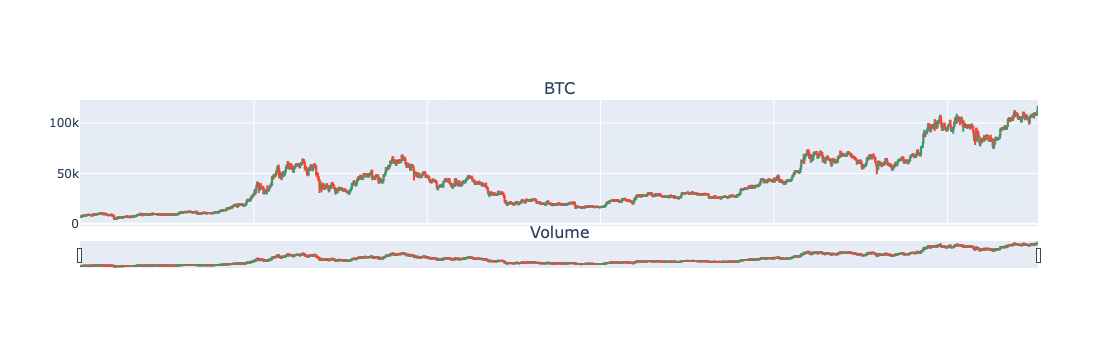

In [15]:
fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC'), row=1, col=1)

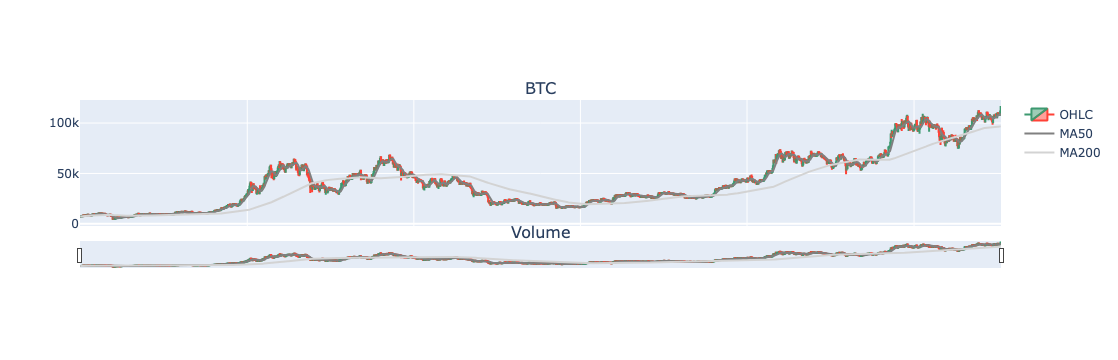

In [17]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='lightgrey', name='MA200'), row=1, col=1)

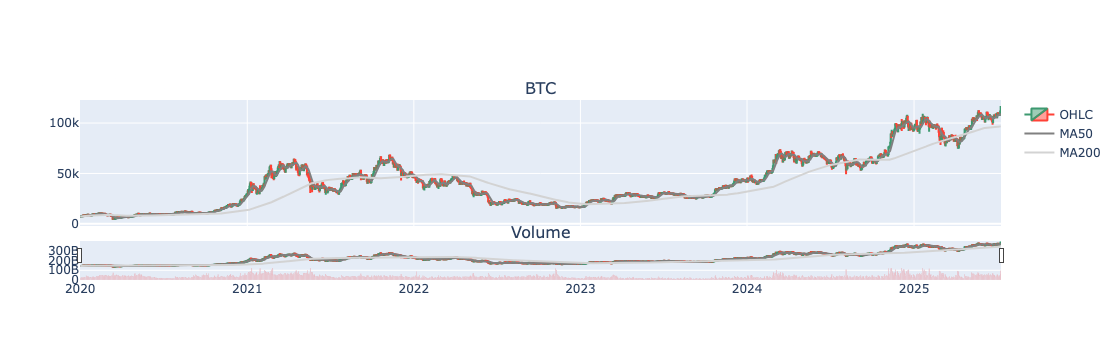

In [19]:
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='red', showlegend=False), row=2, col=1)

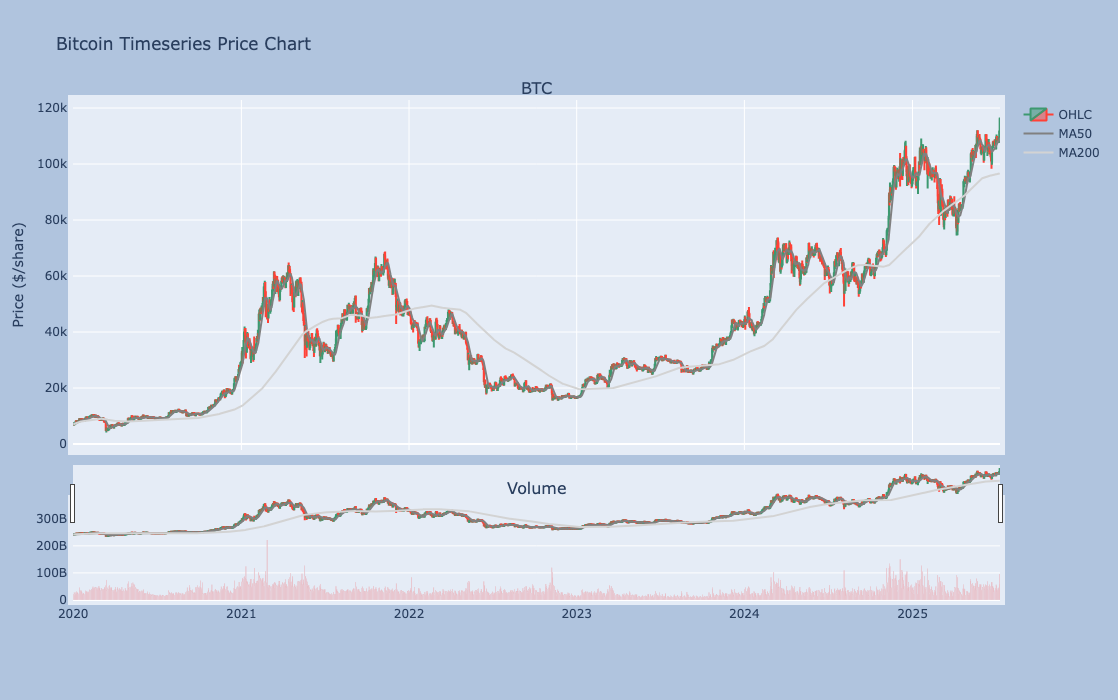

In [21]:
fig.update_layout(
    title = 'Bitcoin Timeseries Price Chart',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price ($/share)',
        titlefont_size = 14,
        tickfont_size = 12 
        ),
    autosize=False,
    width=1100,
    height=700,
    margin=dict(l=50,r=50,b=100,t=100,pad=5),
    paper_bgcolor='LightSteelBlue'
)

In [ ]:
#fig.update(layout_xaxis_rangeslider_visible=False)
#fig.show()